# ÉVALUATION DE L’ÉQUITÉ DES MODÈLES D’APPRENTISSAGE PROFOND PRÉENTRAÎNÉS
# VII. Évaluation des modèles de ResNet50
# Projet de 15 crédits de Wajih Mghazli

In [9]:
from fairness_sdk.data_preparation import RAFDB_loader_api
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Chargement des données de RAF-DB
### 1. 1 Définition des constantes (chemin de la BD, dimensions, etc.)# I. Data preprocessing

In [2]:
FEATURES_PATH = 'dataset/RAF/basic/Image/aligned/'
ANNOTATIONS_PATH = 'dataset/RAF/basic/Annotation/manual/Landmarks_5/'
LABELS_PATH = 'dataset/RAF/basic/EmoLabel/list_patition_label.txt'
img_rows, img_cols, img_channels, num_classes = 224, 224, 3, 7

### 1. 2 Chargement des données de test

In [3]:
data = RAFDB_loader_api(FEATURES_PATH, ANNOTATIONS_PATH, LABELS_PATH, False)

In [7]:
# Combine the subgroups into a single dataset
test_images = np.concatenate((data['images_gender']['male'], data['images_gender']['female'], data['images_race']['caucasian'], data['images_race']['asian'], data['images_race']['african']), axis=0)
test_labels = np.concatenate((data['labels_gender']['male'], data['labels_gender']['female'], data['labels_race']['caucasian'], data['labels_race']['asian'], data['labels_race']['african']), axis=0)

## 3. Chargement des variantes de ResNet50

In [10]:
vanilla_resnet50 = keras.models.load_model('checkpoints/best_vanilla_resnet50.h5')
fine_tuned_resnet50 = keras.models.load_model('checkpoints/best_aumented_resnet50.h5')
fine_tuned_augmented_resnet50 = keras.models.load_model('checkpoints/best_fine_tuned_resnet50.h5')
fine_tuned_augmented_balanced_resnet50 = keras.models.load_model('checkpoints/best_aumented_balanced_resnet50.h5')

2023-05-31 13:25:43.826515: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 13:25:47.395462: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 36390 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:17:00.0, compute capability: 8.6
2023-05-31 13:25:47.397122: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 12080 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:31:00.0, compute capability: 8.6
2023-05-31 13:25:47.398704: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/t

In [11]:
models = {
            'vanilla_resnet50': vanilla_resnet50,
            'fine_tuned_resnet50': fine_tuned_resnet50,
            'fine_tuned_augmented_resnet50': fine_tuned_augmented_resnet50,
            'fine_tuned_augmented_balanced_resnet50': fine_tuned_augmented_balanced_resnet50
         }

## 4. Test des modèles sur l'ensemble de la base de test

In [1]:
# Initialize accuracy dict (for each model)
accs = {}

In [15]:
for model_name, model_ in models.items():
    test_loss, test_acc = model_.evaluate(test_images, test_labels, verbose=0)
    accs[model_name] = test_acc

2023-05-31 13:29:09.230867: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-05-31 13:29:10.572638: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-31 13:29:11.465601: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [2]:
### 4. Printing accuracy of the models accross all the test set

In [16]:
accs

{'vanilla_resnet50': 0.6232073307037354,
 'fine_tuned_resnet50': 0.6756845116615295,
 'fine_tuned_augmented_resnet50': 0.6701434254646301,
 'fine_tuned_augmented_balanced_resnet50': 0.6776401400566101}

## 5. Visualisation des performances (exactitude) des modèles

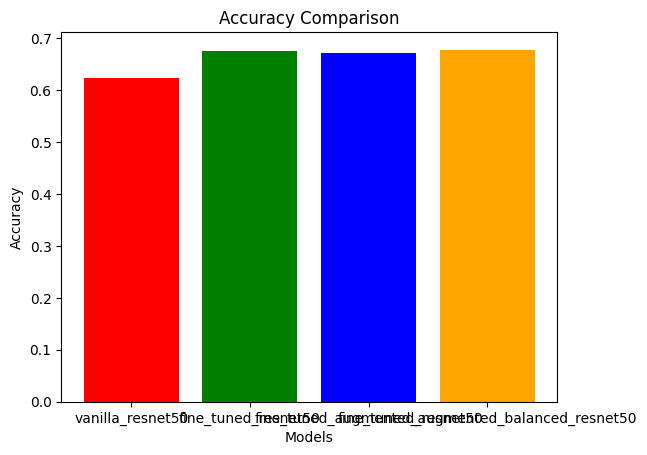

In [5]:
# Define the colors for each bar
colors = ['red', 'green', 'blue', 'orange']

# Extract the model names and accuracy values
model_names = list(accs.keys())
accuracy_values = list(accs.values())

# Plot the bar plot
plt.bar(model_names, accuracy_values, color=colors)

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

# Show the plot
plt.show()